In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [2]:
iris=datasets.load_iris()
X=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(np.int8)
np.c_[X,y]

array([[1.4, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.7, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.1, 0. ],
       [1.5, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.1, 0.1, 0. ],
       [1.2, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.3, 0.4, 0. ],
       [1.4, 0.3, 0. ],
       [1.7, 0.3, 0. ],
       [1.5, 0.3, 0. ],
       [1.7, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1. , 0.2, 0. ],
       [1.7, 0.5, 0. ],
       [1.9, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.4, 0. ],
       [1.5, 0.2, 0. ],
       [1.4, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.6, 0.2, 0. ],
       [1.5, 0.4, 0. ],
       [1.5, 0.1, 0. ],
       [1.4, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.2, 0.2, 0. ],
       [1.3, 0.2, 0. ],
       [1.4, 0.1, 0. ],
       [1.3, 0.2, 0. ],
       [1.5, 0.2, 0. ],
       [1.3, 0.3, 0. ],
       [1.3, 0.3

In [3]:
svm_pipeline=Pipeline([('std_scale',StandardScaler()),
                        ('svm',LinearSVC(C=4,loss="hinge"))])
svm_pipeline.fit(X,y)

Pipeline(memory=None,
     steps=[('std_scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=4, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [4]:
svm_pipeline.predict([[5.5,1.6]])

array([1], dtype=int8)

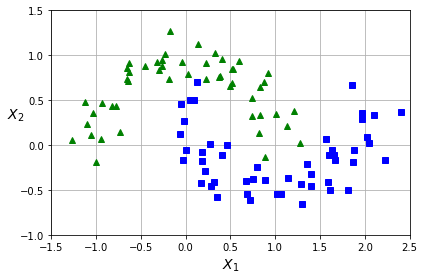

In [5]:
X,y=datasets.make_moons(n_samples=100, noise=0.15,random_state=42)

def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==1],X[:,1][y==1],"bs")
    plt.plot(X[:,0][y==0],X[:,1][y==0],"g^")
    plt.axis(axes)
    plt.xlabel(r"$X_1$",fontsize=14)
    plt.ylabel(r"$X_2$",fontsize=14, rotation=0)
    plt.grid(True, which='both')
    plt.tight_layout()
    plt.show()
    
plot_dataset(X,y,[-1.5,2.5,-1.0,1.5])

In [6]:
from sklearn.preprocessing import PolynomialFeatures
svm_pipeline=Pipeline([('poly_moons',PolynomialFeatures(degree=3)),
                       ('std_scaler',StandardScaler()),
                       ('linear_svm',LinearSVC(C=10,loss='hinge',random_state=42))])
svm_pipeline.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_moons', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svm', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

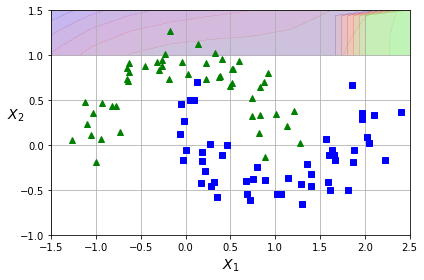

In [7]:
x0s=np.linspace(-1.5,2.5,10)
x1s=np.linspace(1.0,1.5,10)
x0,x1=np.meshgrid(x0s,x1s)
X_new=np.c_[x0.ravel(),x1.ravel()]
y_predict=svm_pipeline.predict(X_new).reshape(x0.shape)
y_decision=svm_pipeline.decision_function(X_new).reshape(x0.shape)
plt.contourf(x0,x1,y_predict,cmap=plt.cm.brg, alpha=0.2)
plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg, alpha=0.1)
plot_dataset(X,y,[-1.5,2.5,-1.0,1.5])

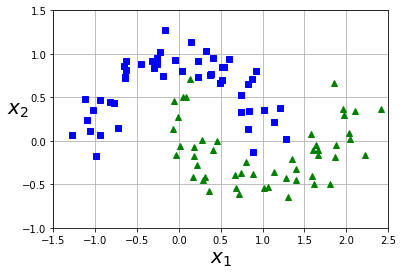

In [8]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [9]:

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

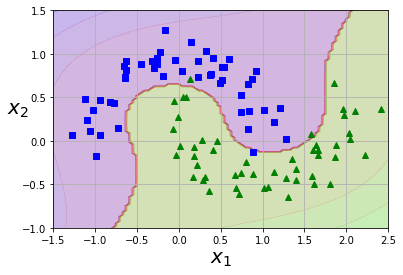

In [10]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [13]:
from sklearn.svm import SVC


array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1], dtype=int64)